#### Importing Libraries


In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, ifft, ifftshift, rfft
import warnings
warnings.filterwarnings("ignore")

#### Defining Parameters

In [69]:
numtaps = 1001
band_width = 1000 #Hz
sampling_rate = 204800 #Hz
num_samples = numtaps
frequency_central = 5000
beta = 0
truncation = 100

#### Loading data

In [70]:
data_path =  r"..\data\avstand_1.npz"
data = np.load(data_path)['data']
s1 = data[0][:num_samples]
s2 = data[1][:num_samples]

noise_path = r"..\data\avstand_1_noise.npz"
data_noise = np.load(noise_path)['data']
q1 = data_noise[0][:num_samples]
q2 = data_noise[1][:num_samples]

mean = 0
std = 1
w1 = np.random.normal(mean, std, size=num_samples)
w2 = np.random.normal(mean, std, size=num_samples)

##### Defining Functions

In [71]:
def plotting_the_characteristics_of_h(h, title):

    fig, ax = plt.subplots(3, 1, figsize=(10,10))
    ax = ax.ravel()

    ax[0].plot(h)
    ax[0].set_title(f"Impulse response {title}")
    ax[0].set_xlabel('samples')
    ax[0].set_ylabel('amplitude')


    w, h = signal.freqz(h, worN=8000)
    ax[1].plot(0.5 * sampling_rate * w / np.pi, 20*np.log10(np.abs(h)), 'b')
    ax[1].set_title(f"Frequency response {title}")
    ax[1].set_xlabel('Frequency [Hz]')
    ax[1].set_ylabel('Amplitude [dB]')

    ax[2].plot(0.5 * sampling_rate * w / np.pi, np.unwrap(np.angle(h)), 'b')
    ax[2].set_title(f"Phase response {title}")
    ax[2].set_xlabel('Frequency [Hz]')
    ax[2].set_ylabel('Phase [radians]')

    fig.tight_layout()


def plotting_cc_3(s1, 
                s1_filt, 
                h, 
                s1_title, 
                s1_filt_title,
                h_title,
                beta):
    
    
    fig, ax = plt.subplots(3, 3, figsize=(10,10))
    ax = ax.ravel()

    cc_s1_s1 = CC(s1, s1, beta)
    cc_s1_s1_filt = CC(s1, s1_filt, beta)
    cc_s1_h = CC(s1, h, beta)

    cc_s1_filt_s1 = CC(s1_filt, s1, beta)
    cc_s1_filt_h = CC(s1_filt, h, beta)
    cc_s1_filt_s1_filt = CC(s1_filt, s1_filt, beta)

    cc_h_s1 = CC(h, s1, beta)
    cc_h_s1_filt = CC(h, s1_filt, beta)
    cc_h_h = CC(h, h, beta)

    

    ax[0].plot(cc_s1_s1)
    ax[0].set_title(f"corr({s1_title},{s1_title})")

    ax[1].plot(cc_s1_s1_filt)
    ax[1].set_title(f"corr({s1_title},{s1_filt_title})")

    ax[2].plot(cc_s1_h)
    ax[2].set_title(f"corr({s1_title},{h_title})")

    ax[3].plot(cc_s1_filt_s1)   
    ax[3].set_title(f"corr({s1_filt_title},{s1_title})")

    ax[4].plot(cc_s1_filt_s1_filt)
    ax[4].set_title(f"corr({s1_filt_title},{s1_filt_title})")

    ax[5].plot(cc_s1_filt_h)
    ax[5].set_title(f"corr({s1_filt_title},{h_title})")

    ax[6].plot(cc_h_s1)
    ax[6].set_title(f"corr({h_title},{s1_title})")

    ax[7].plot(cc_h_s1_filt)
    ax[7].set_title(f"corr({h_title},{s1_filt_title})")

    ax[8].plot(cc_h_h)
    ax[8].set_title(f"corr({h_title},{h_title})")


    fig.suptitle(f"Cross correlation {s1_title}, {s1_filt_title} and {h_title}")
    fig.tight_layout()
def plotting_auto_corr(a,
                       b, 
                       c, 
                       d, 
                       a_title,
                       b_title,
                       c_title,
                       d_title,
                       beta):
    
    fig, ax = plt.subplots(4,1, figsize=(10,10), sharey = True, sharex = True )
    ax = ax.ravel()

    cc_a_a = CC(a, a, beta)
    cc_b_b = CC(b, b, beta)
    cc_c_c = CC(c, c, beta)
    cc_d_d = CC(d, d, beta)

    ax[0].plot(cc_a_a)
    ax[0].set_title(f"corr({a_title},{a_title})")

    ax[1].plot(cc_b_b)
    ax[1].set_title(f"corr({b_title},{b_title})")

    ax[2].plot(cc_c_c)
    ax[2].set_title(f"corr({c_title},{c_title})")

    ax[3].plot(cc_d_d)
    ax[3].set_title(f"corr({d_title},{d_title})")

    ax[0].set_ylim(-1,1)
    ax[1].set_ylim(-1,1)
    ax[2].set_ylim(-1,1)
    ax[3].set_ylim(-1,1)

    fig.suptitle(f"Auto correlation {a_title}, {b_title}, {c_title} and {d_title}")
    fig.tight_layout()
def plotting_spectrum(a,
                      b, 
                      c, 
                      a_title,
                      b_title,
                      c_title):
    rfft_a = rfft(a)
    rfft_b = rfft(b)
    rfft_c = rfft(c)

    freq = np.fft.rfftfreq(len(a), d=1/sampling_rate)

    fig, ax = plt.subplots(3,2, figsize=(10,10))

    ax = ax.ravel()

    ax[0].plot(freq, 20*np.log10(np.abs(rfft_a)))
    ax[0].set_title(f"Spectrum {a_title}")
    ax[0].set_xlabel("Frequency [Hz]")
    ax[0].set_ylabel("Amplitude [dB]")
    #ax[0].set_xlim(0, 10000)

    ax[1].plot(freq, np.unwrap(np.angle(rfft_a)))
    ax[1].set_title(f"Phase {a_title}")
    ax[1].set_xlabel("Frequency [Hz]")
    ax[1].set_ylabel("Phase [rad]")

    ax[2].plot(freq, 20*np.log10(np.abs(rfft_b)))
    ax[2].set_title(f"Spectrum {b_title}")
    ax[2].set_xlabel("Frequency [Hz]")
    ax[2].set_ylabel("Amplitude [dB]")
    #ax[2].set_xlim(0, 10000)

    ax[3].plot(freq, np.unwrap(np.angle(rfft_b)))
    ax[3].set_title(f"Phase {b_title}")
    ax[3].set_xlabel("Frequency [Hz]")
    ax[3].set_ylabel("Phase [rad]")

    ax[4].plot(freq, 20*np.log10(np.abs(rfft_c)))
    ax[4].set_title(f"Spectrum {c_title}")
    ax[4].set_xlabel("Frequency [Hz]")
    ax[4].set_ylabel("Amplitude [dB]")
    #ax[4].set_xlim(0, 10000)

    ax[5].plot(freq, np.unwrap(np.angle(rfft_c)))
    ax[5].set_title(f"Phase {c_title}")
    ax[5].set_xlabel("Frequency [Hz]")
    ax[5].set_ylabel("Phase [rad]")
    fig.tight_layout()
def plotting_raw_data(data): 
    fig, ax = plt.subplots(3,1,figsize=(10,10))

    ax = ax.ravel()

    ax[0].plot(data[0])
    ax[0].set_title('sensor_1')
    ax[0].set_xlabel('samples')
    ax[0].set_ylabel('amplitude')

    ax[1].plot(data[1])
    ax[1].set_title('sensor_2')
    ax[1].set_xlabel('samples')
    ax[1].set_ylabel('amplitude')

    ax[2].plot(data[2])
    ax[2].set_title('sensor_3')
    ax[2].set_xlabel('samples')
    ax[2].set_ylabel('amplitude')

    fig.tight_layout()
def CC(x, y, beta):

    window = signal.windows.boxcar(len(x))
    s1 = x * window
    s2 = y * window
    
    f_s1 = fft(s1)
    f_s2 = fft(s2)

    G12 = f_s1 * np.conj(f_s2)
    denom = abs(G12)
    denom[denom < 1e-6] = 1e-6

    f_s = G12 / denom**beta
    cc12 = ifft(f_s)
    cc12 = ifftshift(cc12)
    cc12 = cc12/np.max(np.abs(cc12))
    cc12 = cc12[len(cc12)//2-truncation:len(cc12)//2+truncation]
    return cc12
def plotting_cc_2(a,
                  b, 
                  a_title,
                  b_title,
                  beta):
    
    fig, ax = plt.subplots(2, 2, figsize=(10,10))
    ax = ax.ravel()

    cc_a_a = CC(a, a, beta)
    cc_b_b = CC(b, b, beta)
    cc_a_b = CC(a, b, beta)
    cc_b_a = CC(b, a, beta)


    ax[0].plot(cc_a_a)
    ax[0].set_title(f"corr({a_title},{a_title})")

    ax[1].plot(cc_b_b)
    ax[1].set_title(f"corr({b_title},{b_title})")

    ax[2].plot(cc_a_b)
    ax[2].set_title(f"corr({a_title},{b_title})")

    ax[3].plot(cc_b_a)
    ax[3].set_title(f"corr({b_title},{a_title})")

    fig.suptitle(f"Cross correlation {a_title} and {b_title}")
    fig.tight_layout() 

#### Plotting the raw data

Plotting the signal data


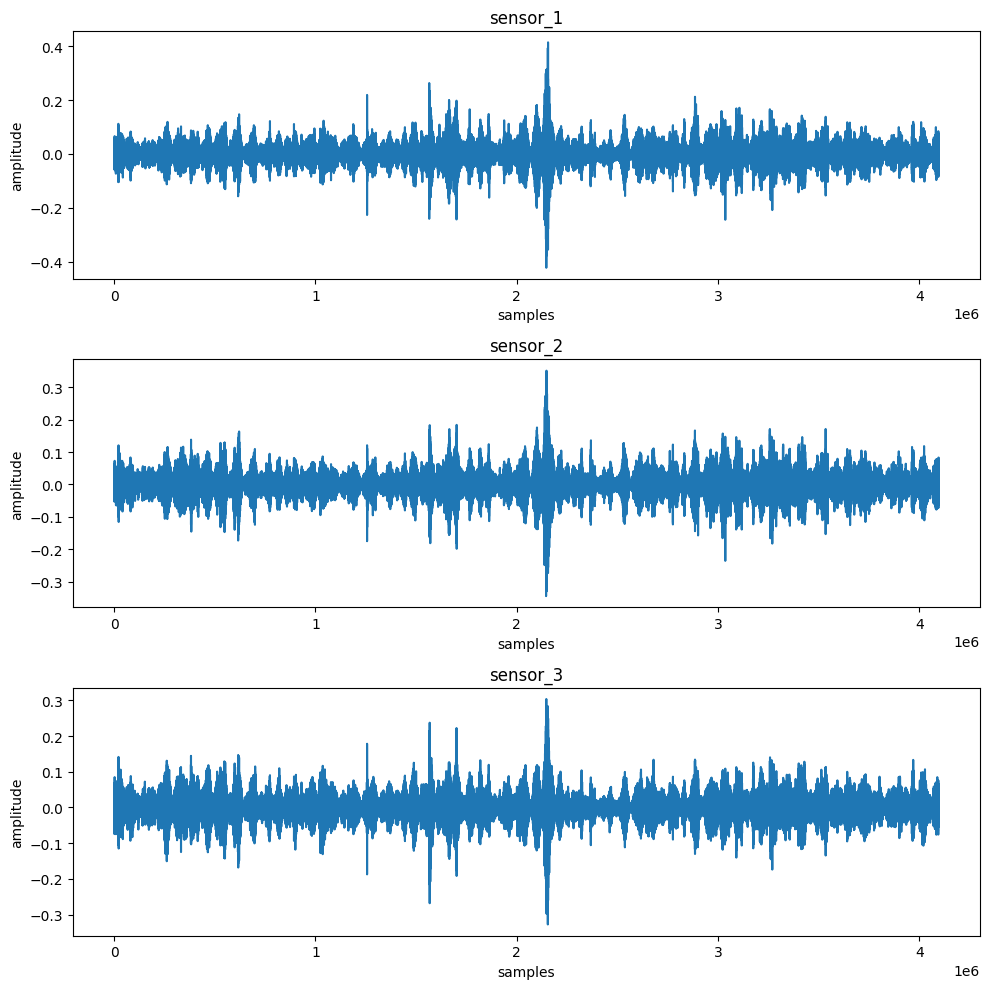

In [72]:
print("Plotting the signal data")
plotting_raw_data(data)

Plotting the noise data


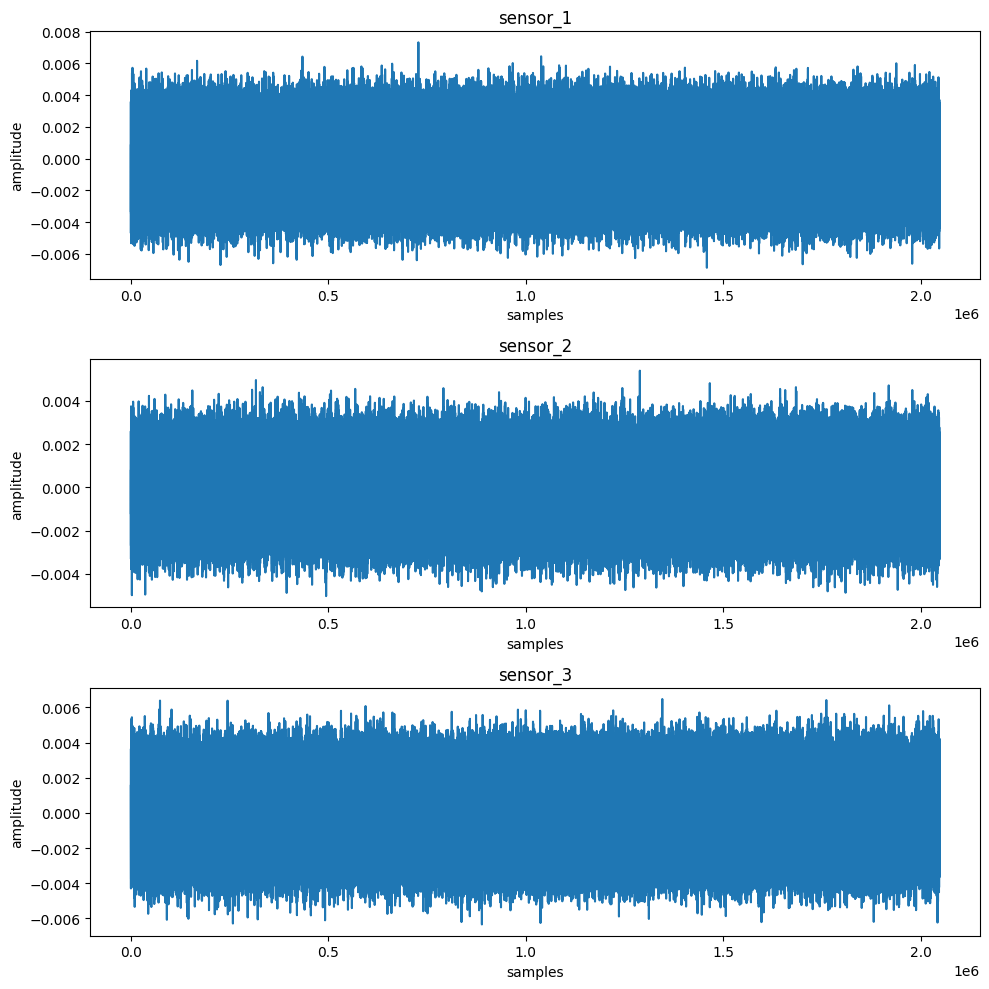

In [73]:
print("Plotting the noise data")
plotting_raw_data(data_noise)

#### Generating filter

In [74]:
filter_coefficients = signal.firwin(numtaps, [frequency_central - band_width//2, frequency_central + band_width//2], fs=sampling_rate, pass_zero="bandpass")

#### Generating Impulse Response

In [75]:
impulse = np.zeros(num_samples) 
impulse[0] = 1  
h = signal.lfilter(filter_coefficients, 1, impulse) 

#### Plotting filter characteristics

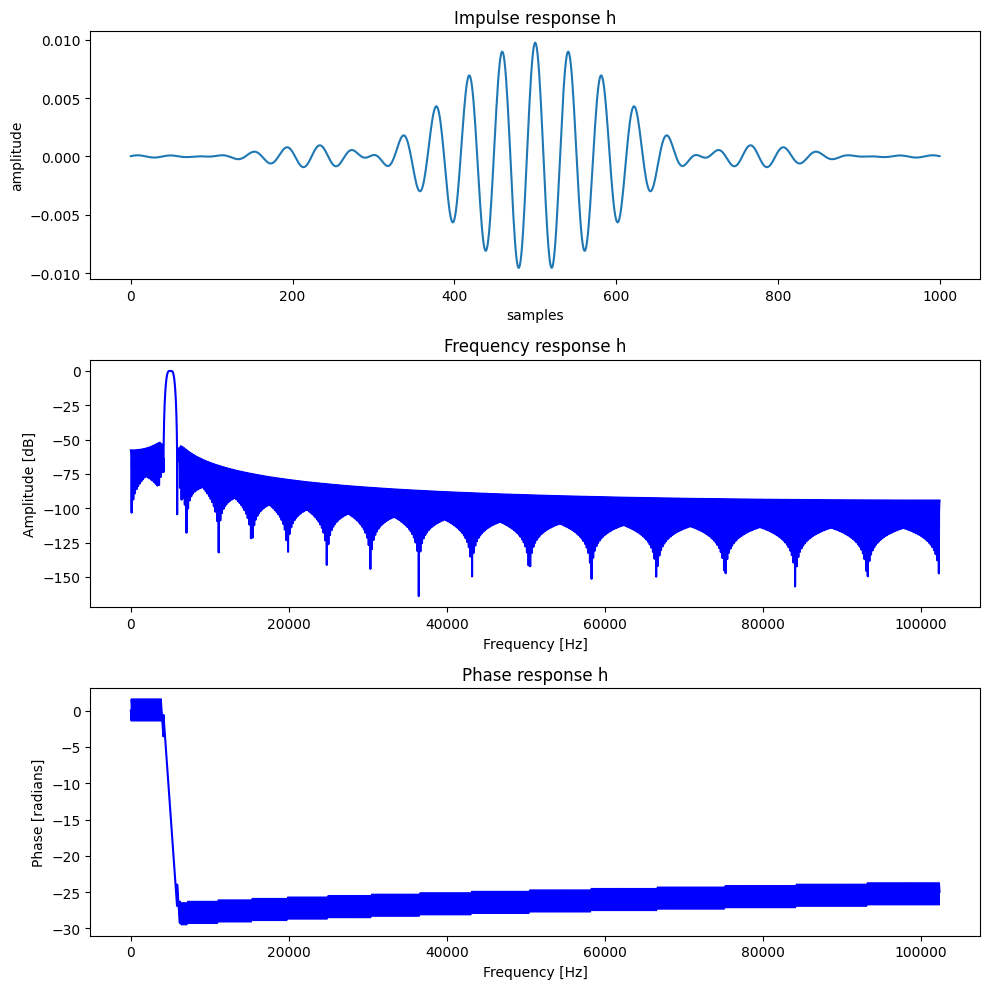

In [76]:
plotting_the_characteristics_of_h(h, "h")

#### Plotting the spectrum of the unfiltered signals

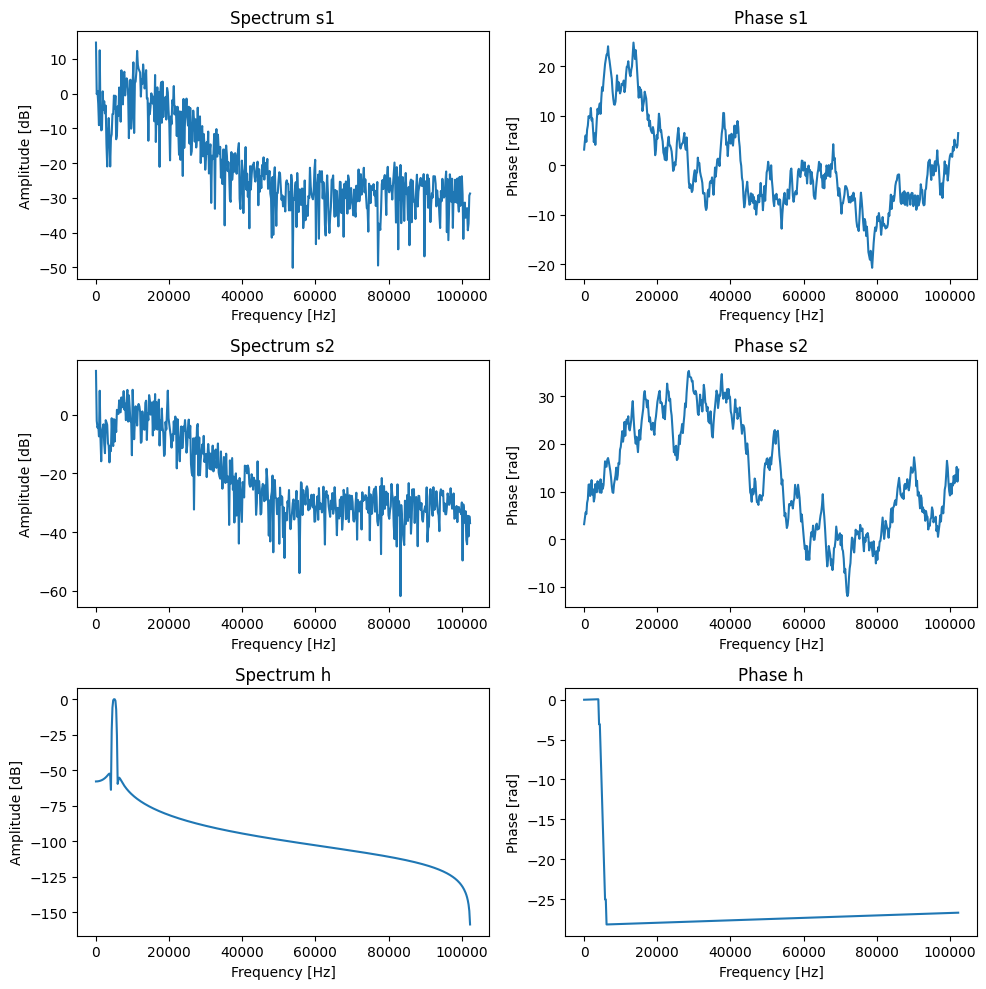

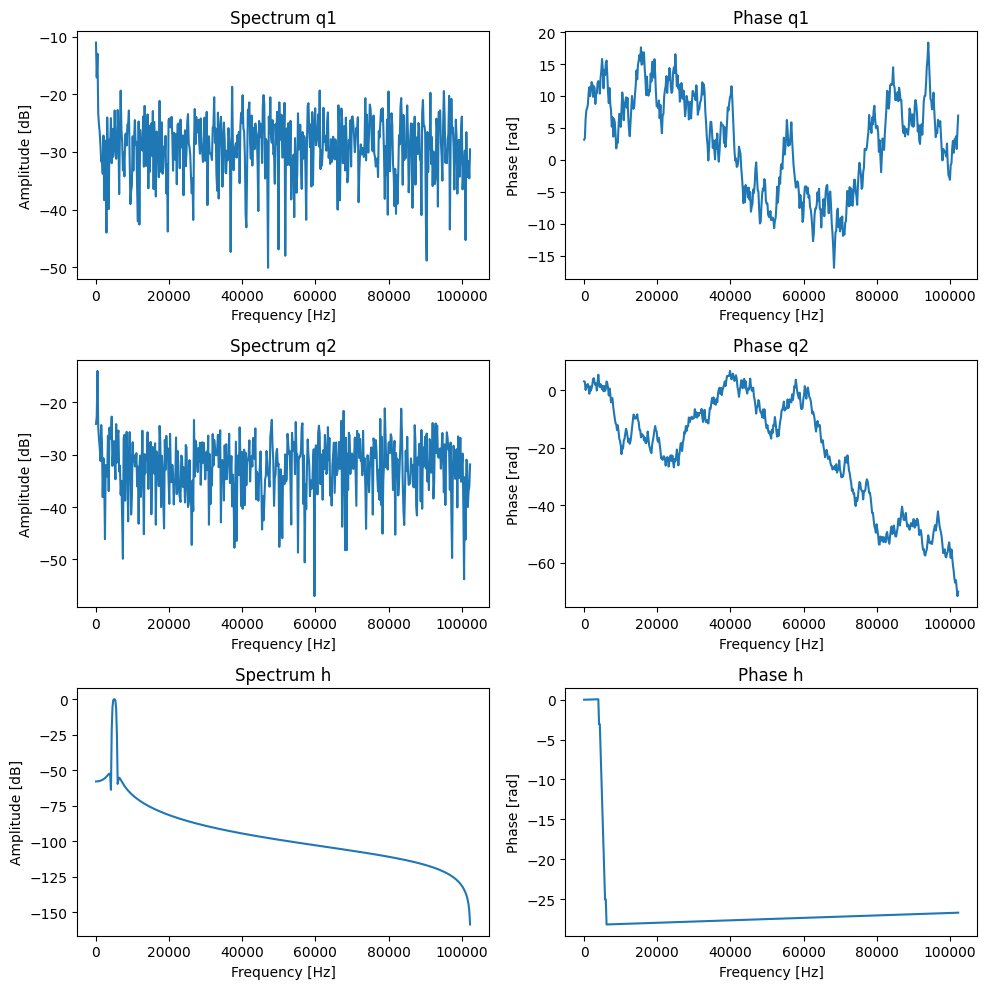

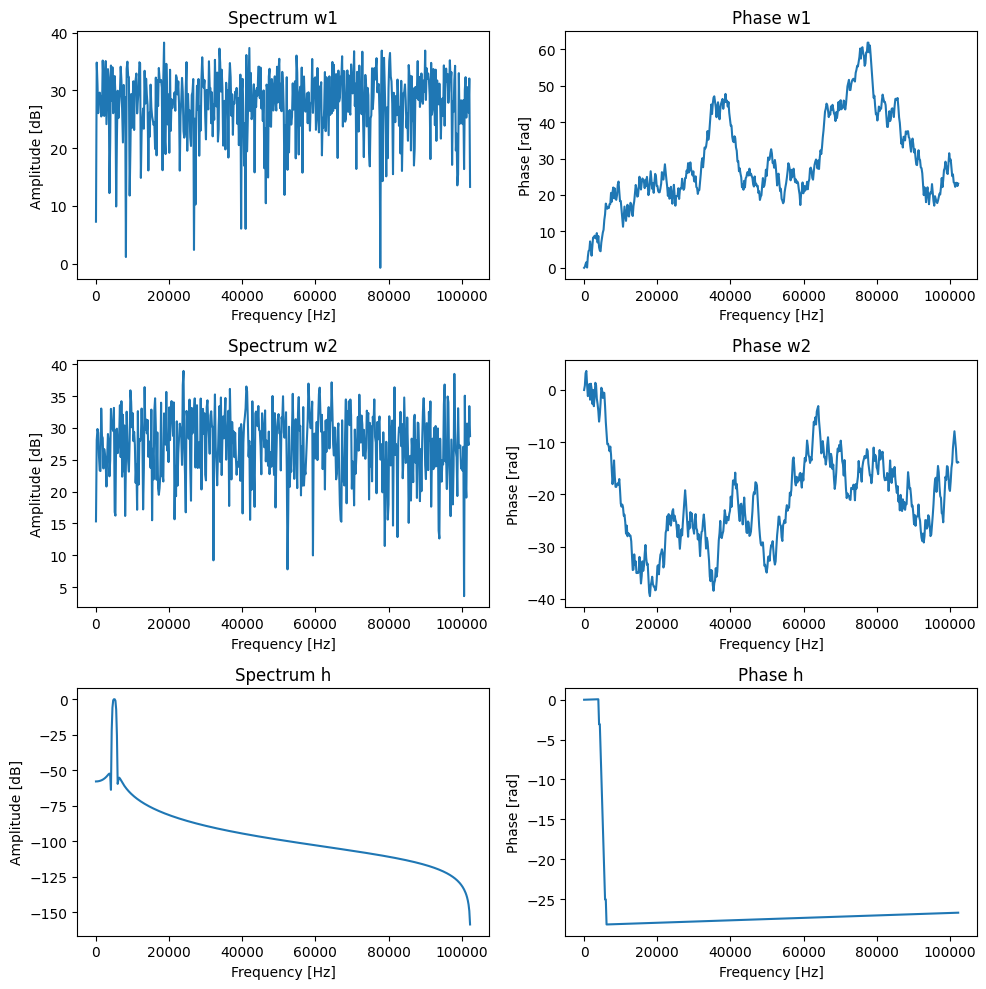

In [77]:
plotting_spectrum(s1, s2, h, "s1", "s2", "h")
plotting_spectrum(q1, q2, h, "q1", "q2", "h")   
plotting_spectrum(w1, w2, h, "w1", "w2", "h")


#### Plotting the auto correlation

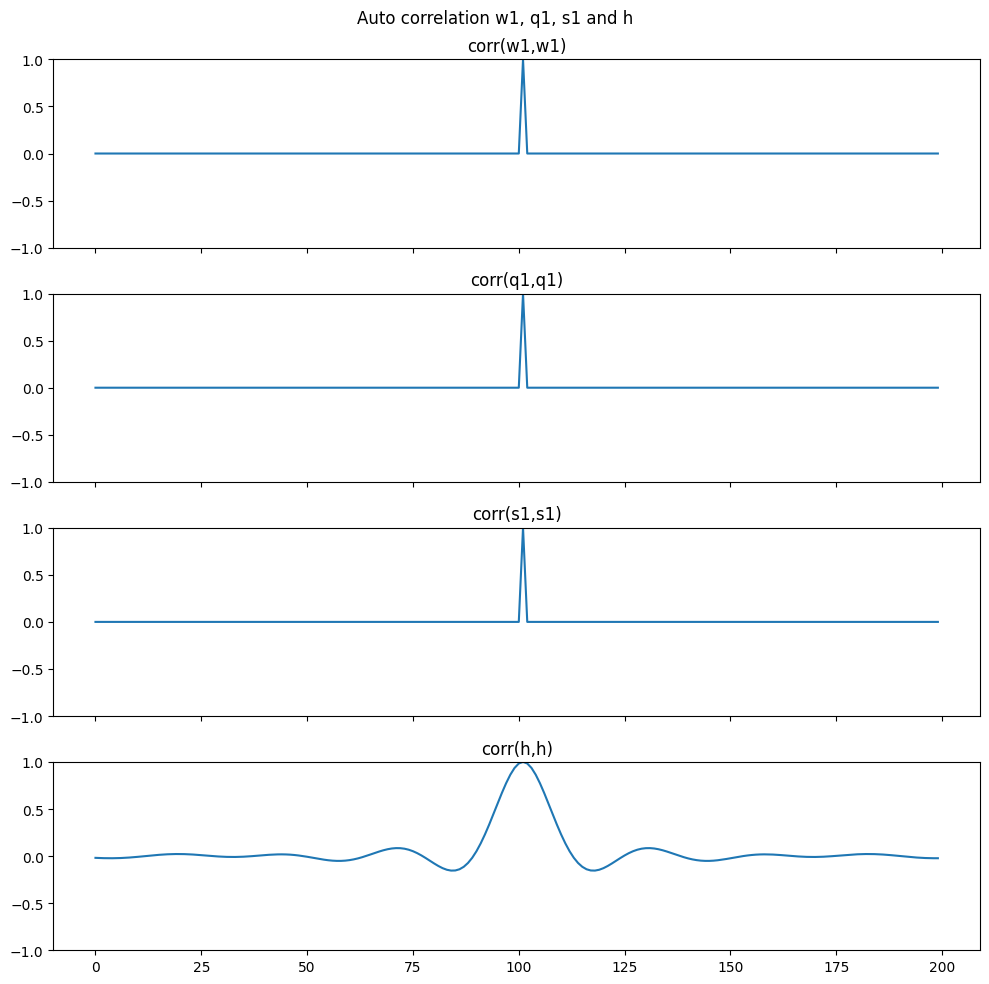

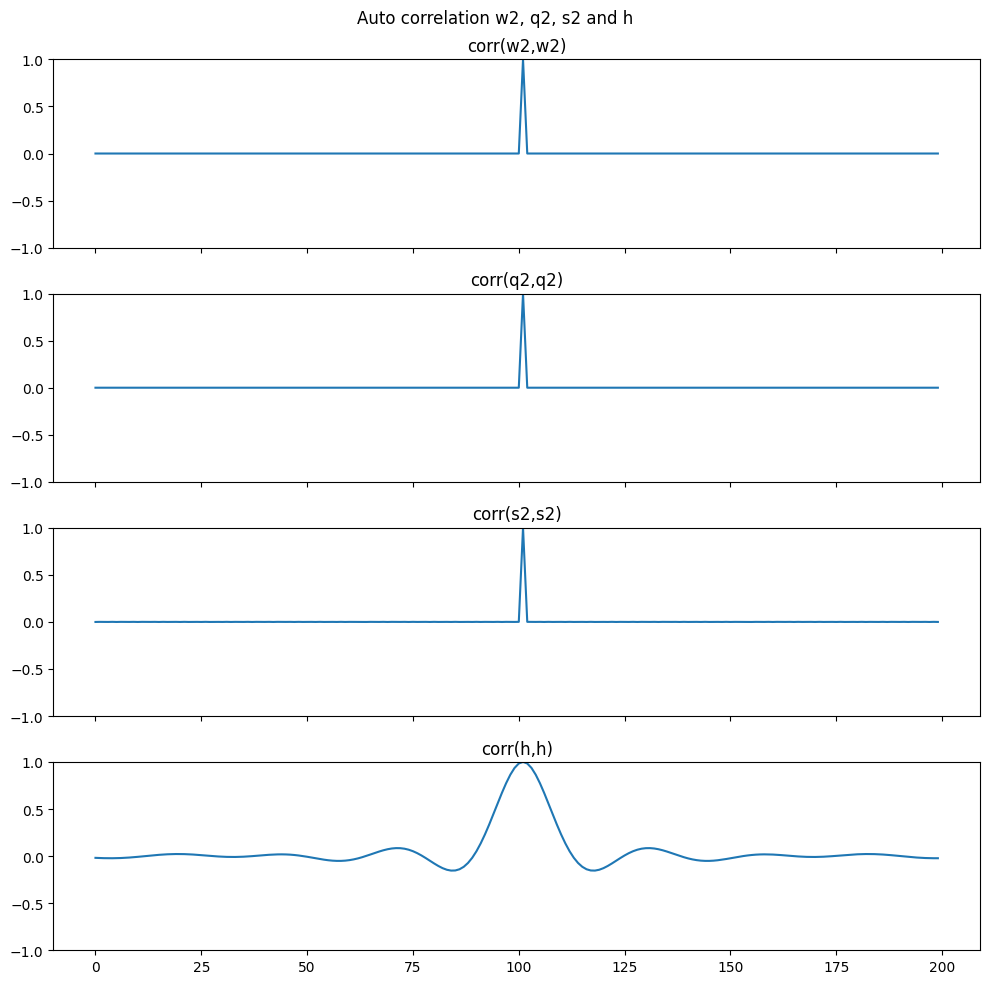

In [78]:
plotting_auto_corr(w1, q1, s1, h, "w1", "q1", "s1", "h", 1)
plotting_auto_corr(w2, q2, s2, h, "w2", "q2", "s2", "h", 1)

#### Filtering the signals 

In [79]:
w1_filt = signal.lfilter(filter_coefficients, 1, w1)
w2_filt = signal.lfilter(filter_coefficients, 1, w2)
q1_filt = signal.lfilter(filter_coefficients, 1, q1)
q2_filt = signal.lfilter(filter_coefficients, 1, q2)
s1_filt = signal.lfilter(filter_coefficients, 1, s1)
s2_filt = signal.lfilter(filter_coefficients, 1, s2)

#### Plotting the autocorrelation of the filtered signals

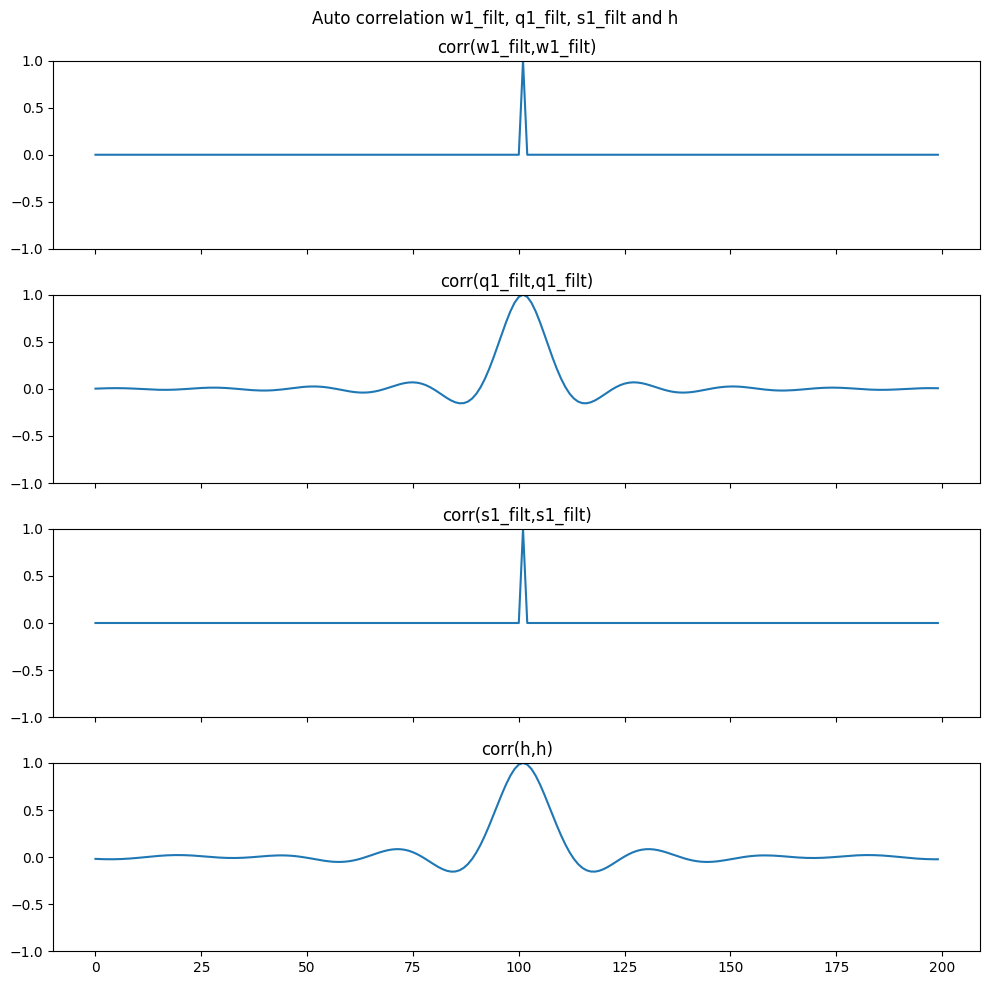

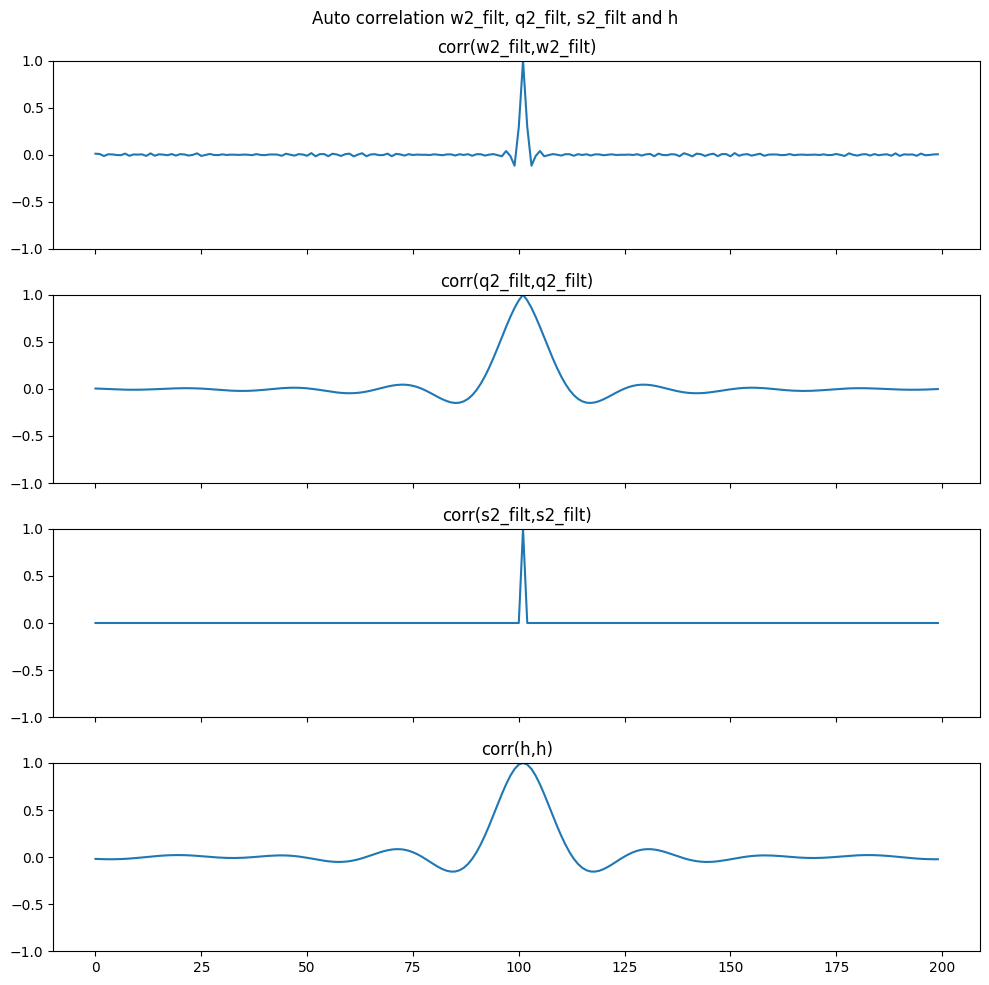

In [80]:
plotting_auto_corr(w1_filt, q1_filt, s1_filt, h, "w1_filt", "q1_filt", "s1_filt", "h", 1)
plotting_auto_corr(w2_filt, q2_filt, s2_filt, h, "w2_filt", "q2_filt", "s2_filt", "h", 1)


#### Plotting the spectrum after filtering the signals


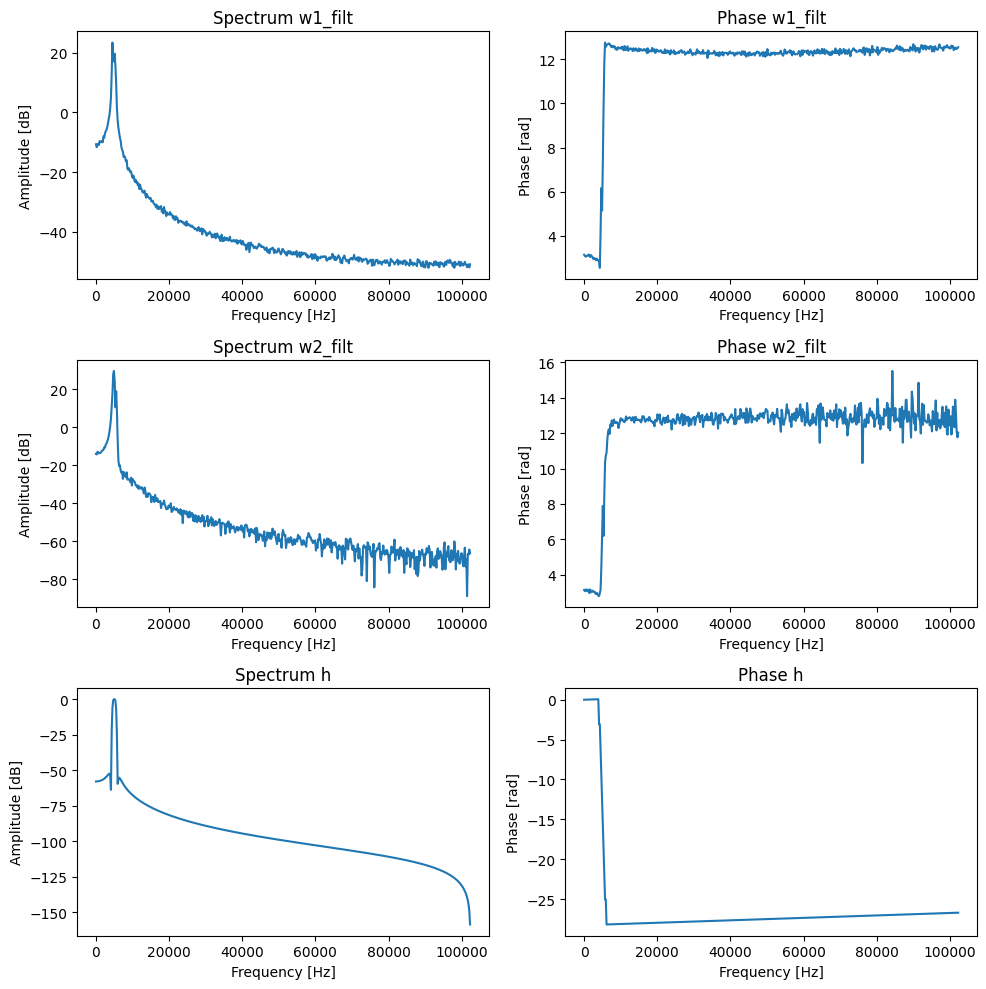

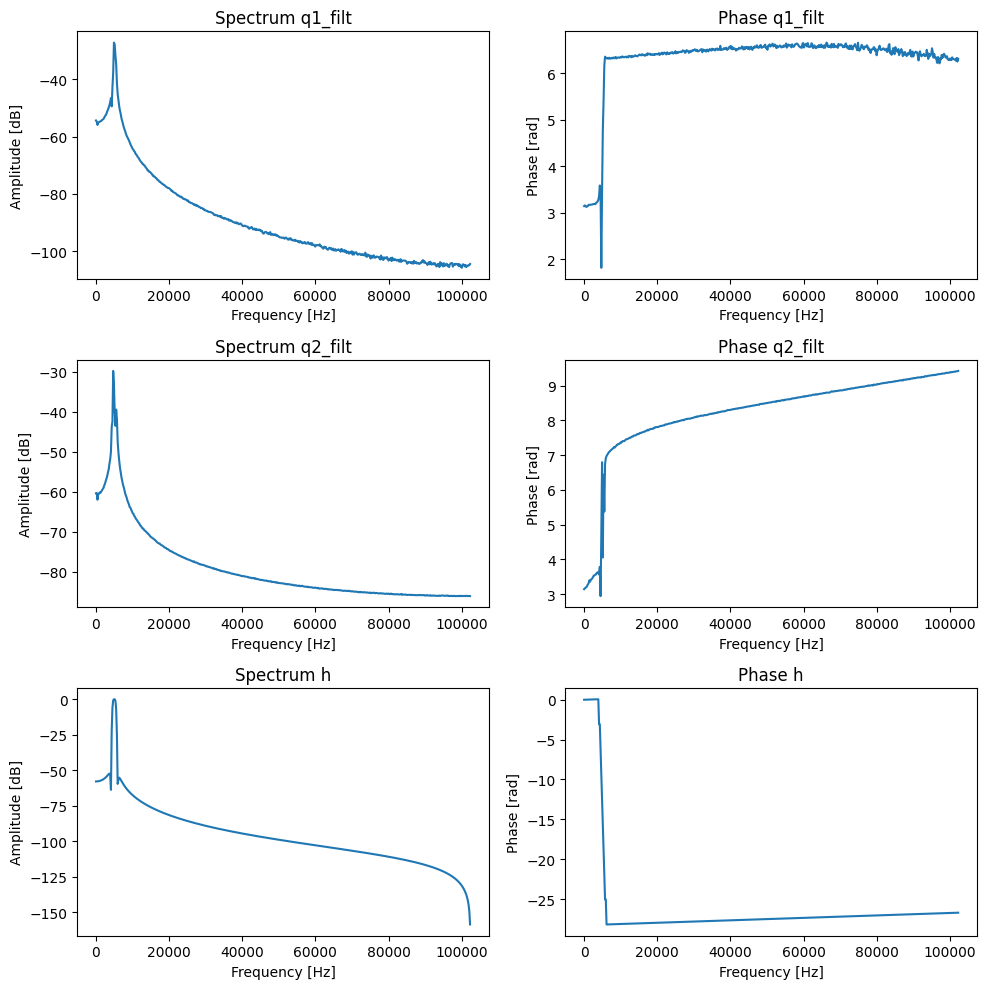

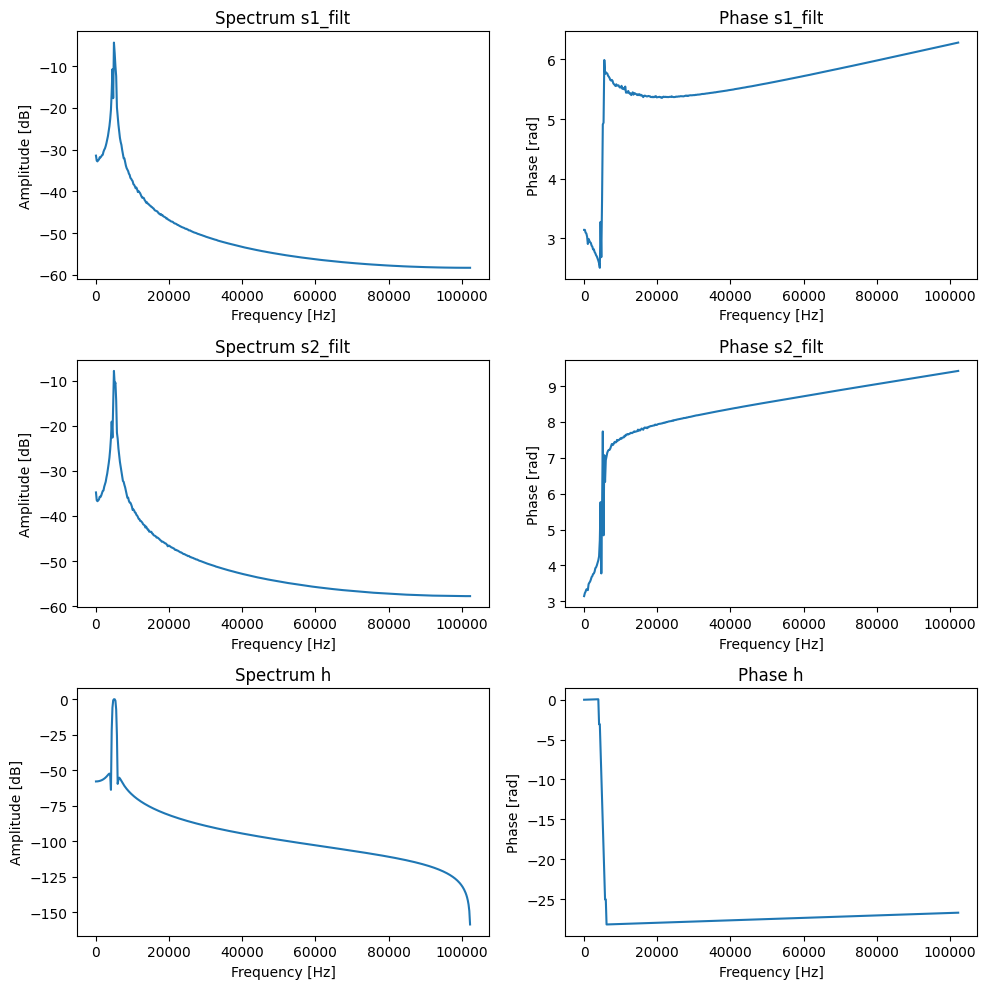

In [81]:
plotting_spectrum(w1_filt, w2_filt, h, "w1_filt", "w2_filt", "h")
plotting_spectrum(q1_filt, q2_filt, h, "q1_filt", "q2_filt", "h")
plotting_spectrum(s1_filt, s2_filt, h, "s1_filt", "s2_filt", "h")

#### Plotting the cross correlations

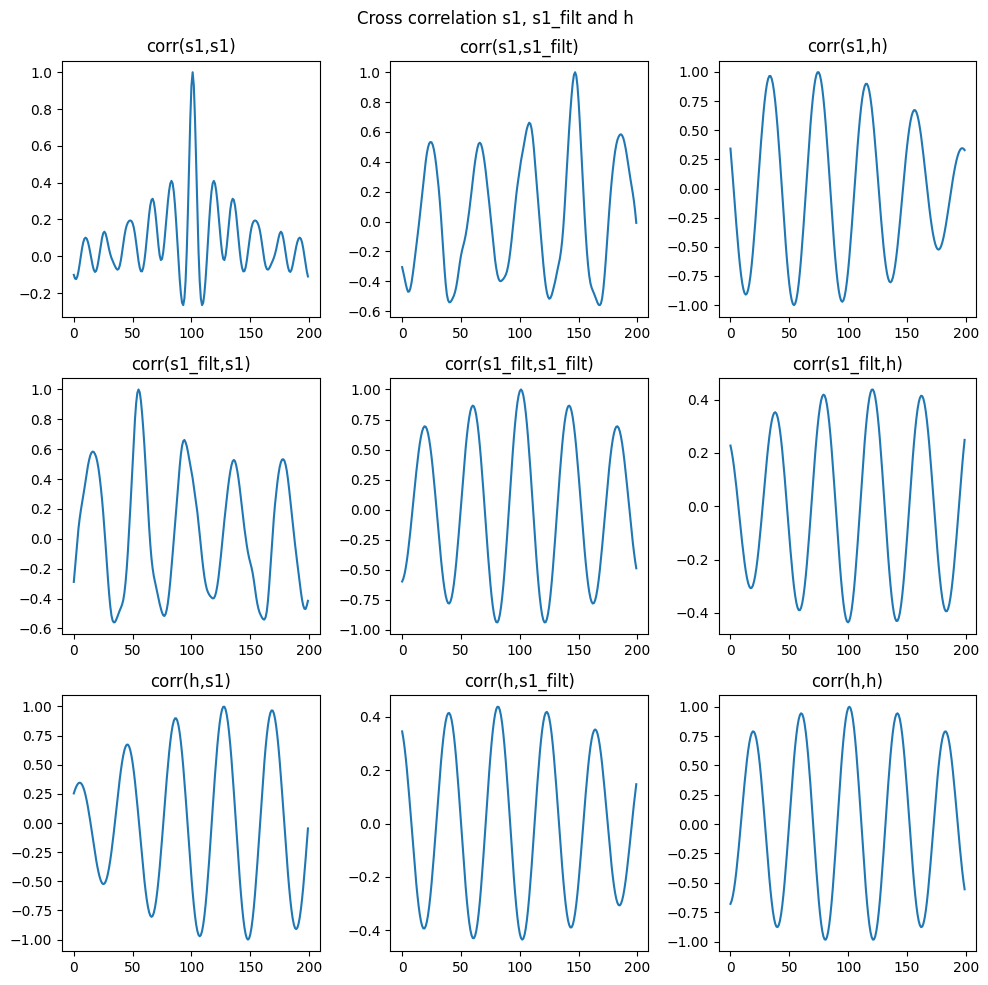

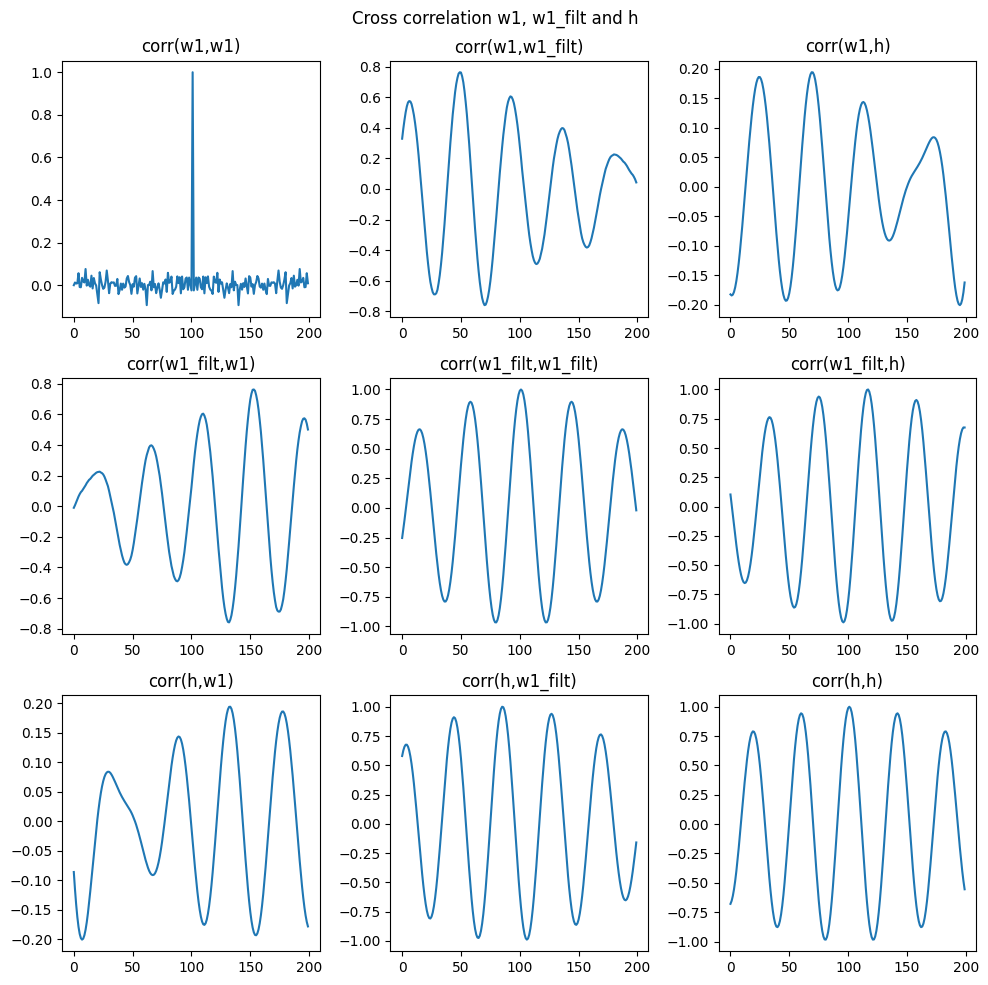

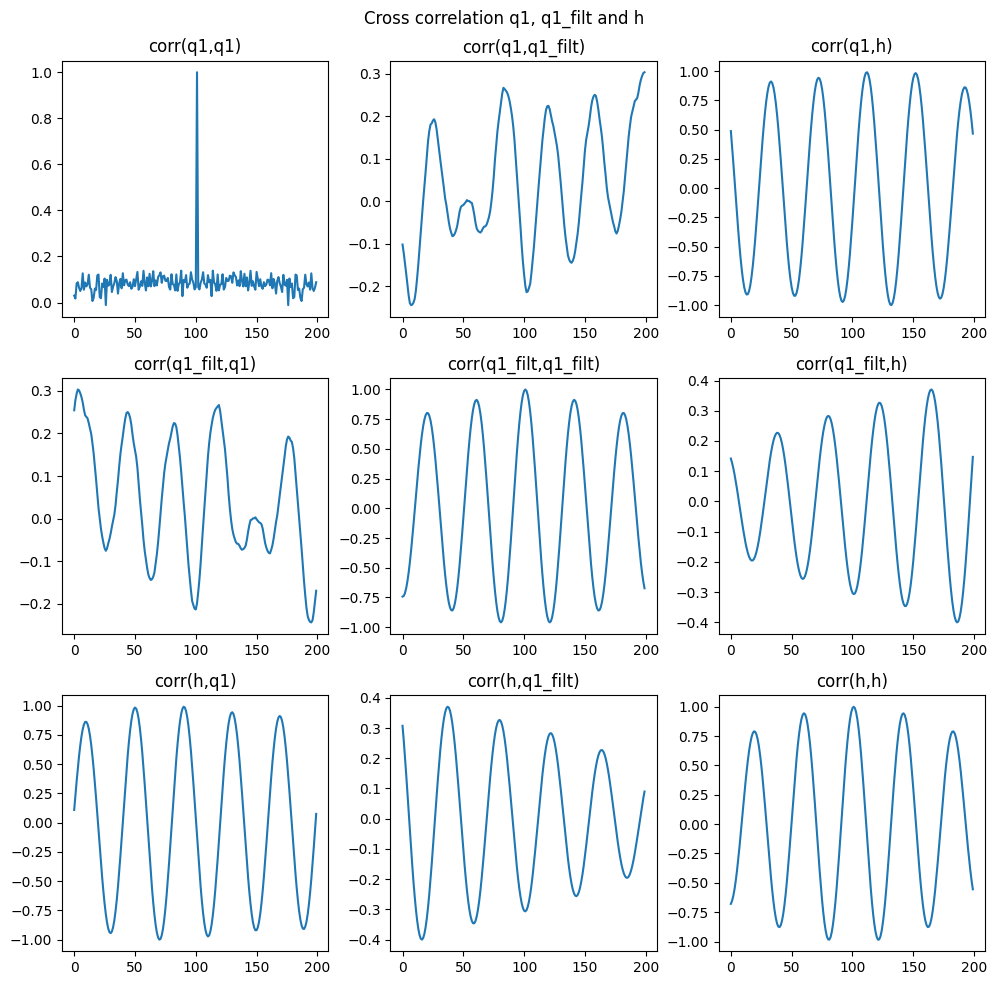

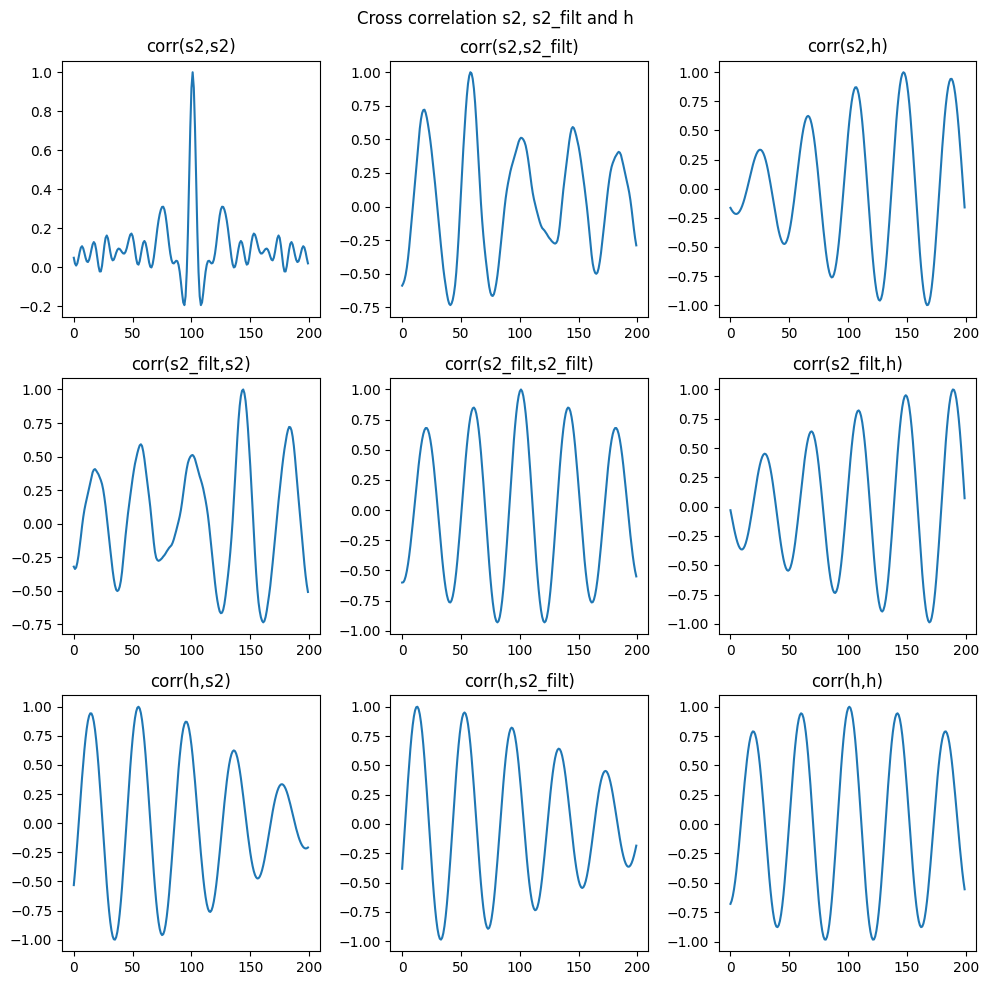

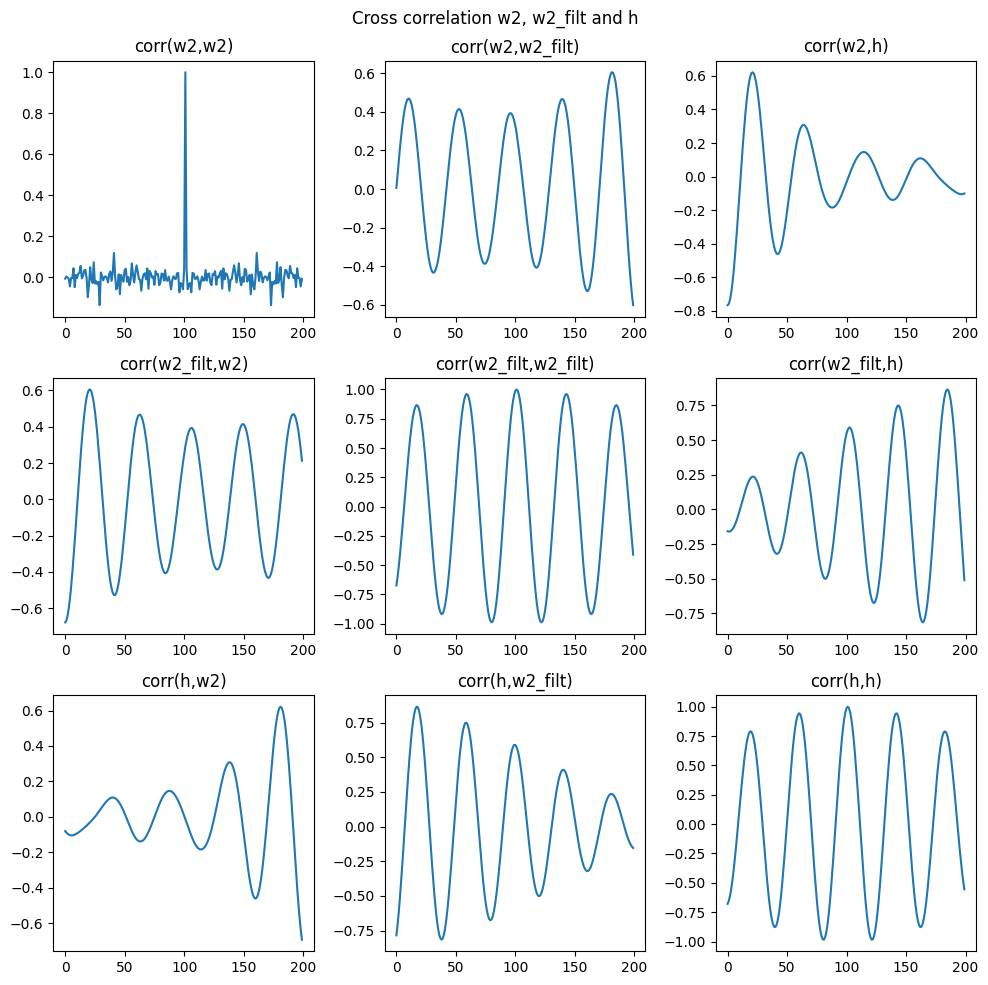

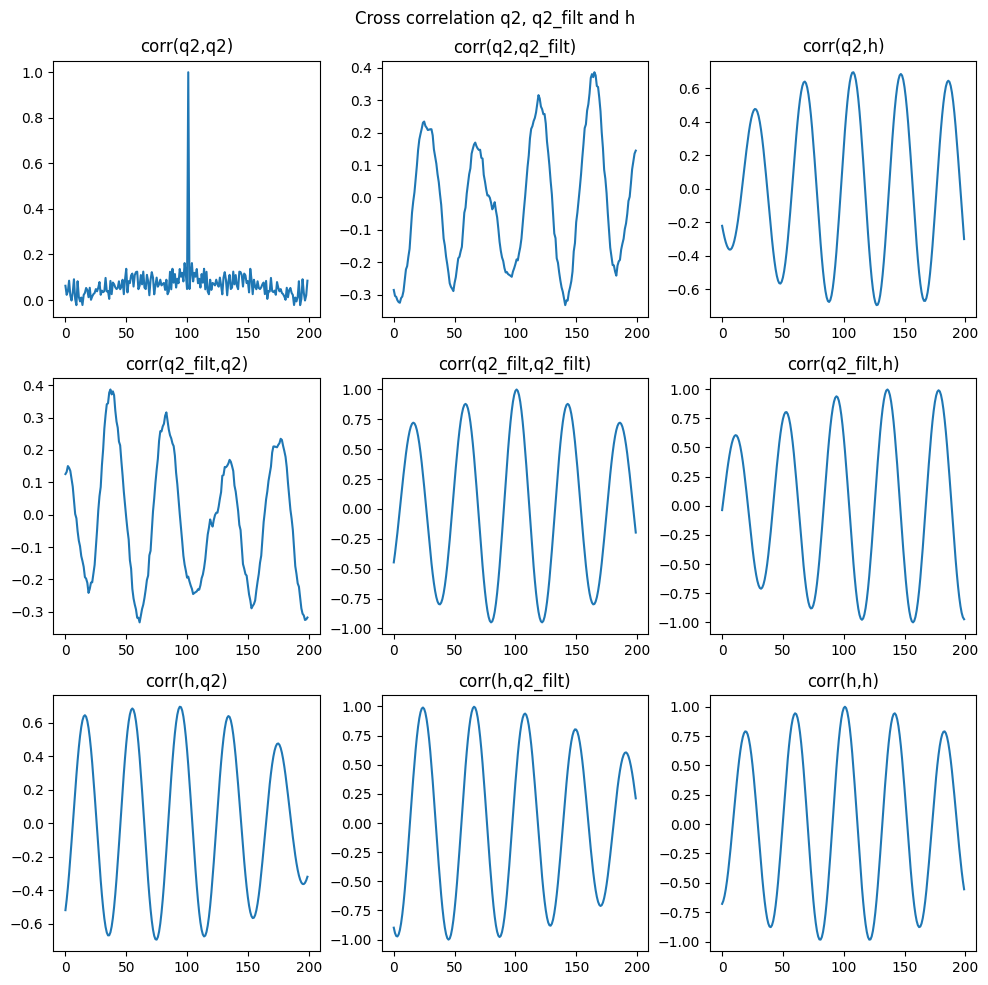

In [82]:
plotting_cc_3(s1, s1_filt, h, "s1", "s1_filt", "h", beta)
plotting_cc_3(w1, w1_filt, h, "w1", "w1_filt", "h", beta)
plotting_cc_3(q1, q1_filt, h, "q1", "q1_filt", "h", beta)
plotting_cc_3(s2, s2_filt, h, "s2", "s2_filt", "h", beta)
plotting_cc_3(w2, w2_filt, h, "w2", "w2_filt", "h", beta)
plotting_cc_3(q2, q2_filt, h, "q2", "q2_filt", "h", beta)

#### Plotting the cross correlation betwen the filtered signals

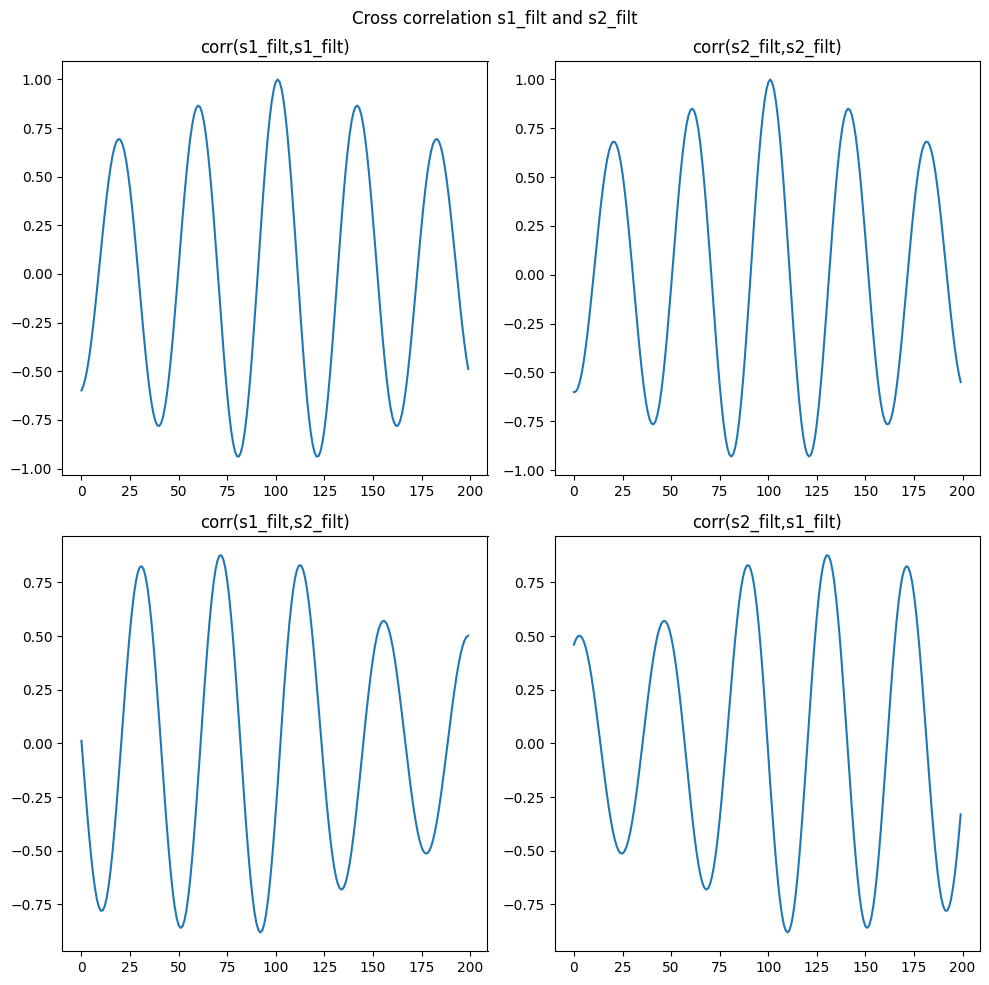

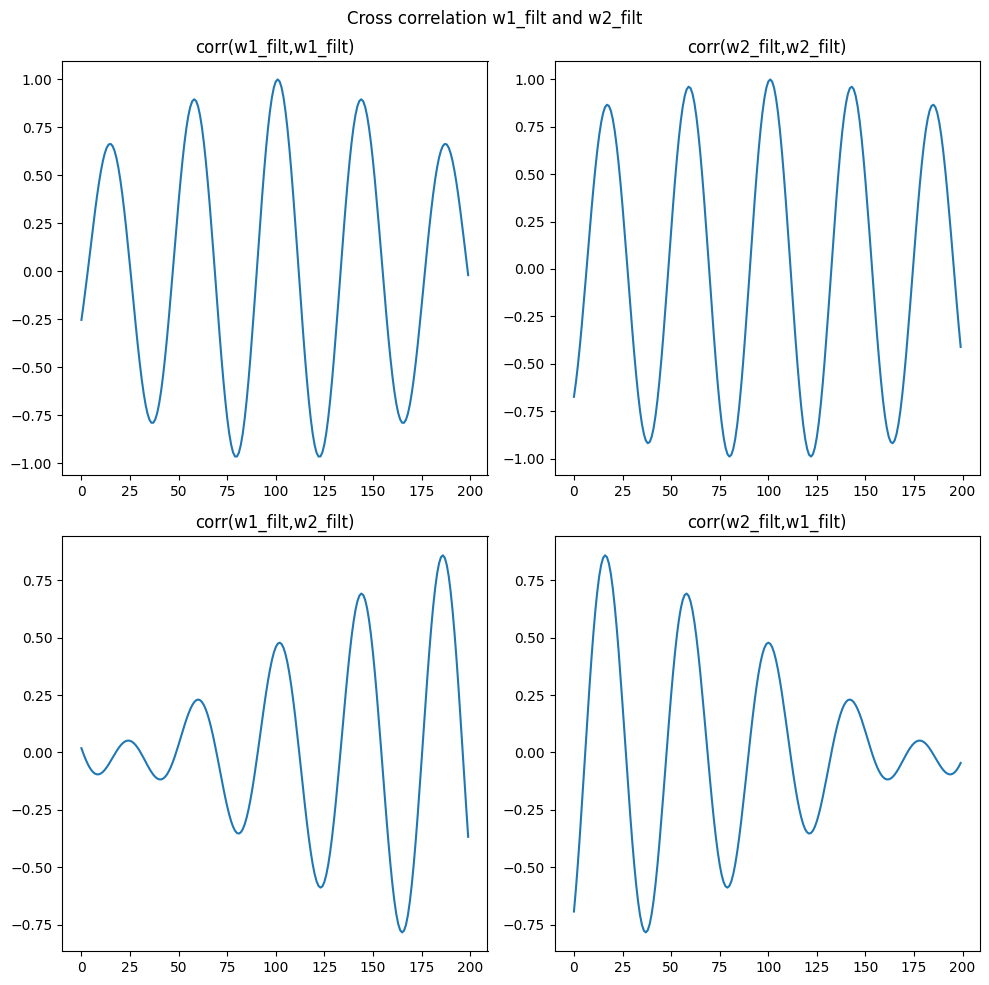

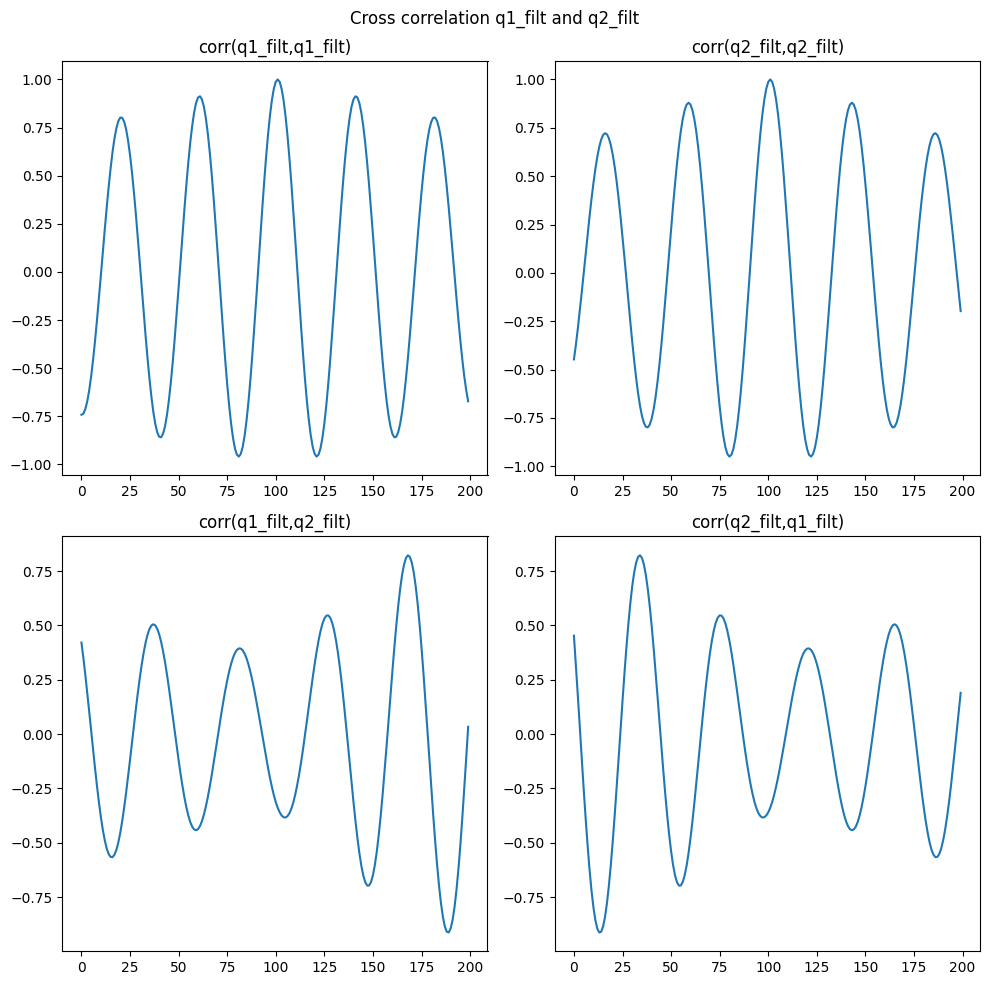

In [83]:
plotting_cc_2(s1_filt, s2_filt, "s1_filt", "s2_filt", beta)
plotting_cc_2(w1_filt, w2_filt, "w1_filt", "w2_filt", beta)
plotting_cc_2(q1_filt, q2_filt, "q1_filt", "q2_filt", beta)
